<a href="https://colab.research.google.com/github/MNagaHarshithRao/RolexPricePrediction/blob/main/RolexPricePrediction_iynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display



**Data Loading and Preprocessing**

In [ ]:
data = pd.read_csv("rolex_scaper_clean.csv")  # Replace with your actual file path
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
data = data.drop_duplicates()

**Handle missing values**

In [ ]:
for col in data.select_dtypes(include=['number']).columns:
    data[col] = data[col].fillna(data[col].mean())
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

<ipython-input-3-31cb5ceae925>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].mean())
<ipython-input-3-31cb5ceae925>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].mode()[0])


**Label Encoding for categorical features**

In [ ]:
categorical_features = ['model', 'reference_number', 'aditional_shipping_price', 'ad_name',
                        'movement', 'case_material', 'case_diameter', 'year_of_production',
                        'condition', 'location', 'scope_of_delivery']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

**Model Training**

In [ ]:
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Store column names before scaling**

In [ ]:
X_columns = X.columns

**Apply StandardScaler**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Applying Linear Regression**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Distribution of price**

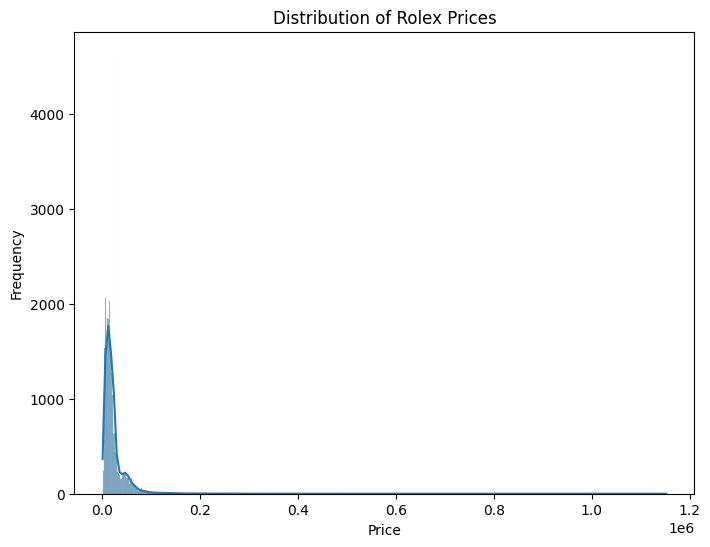

In [ ]:
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True)  # kde=True adds a density curve
plt.title('Distribution of Rolex Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Price vs Categorical features**

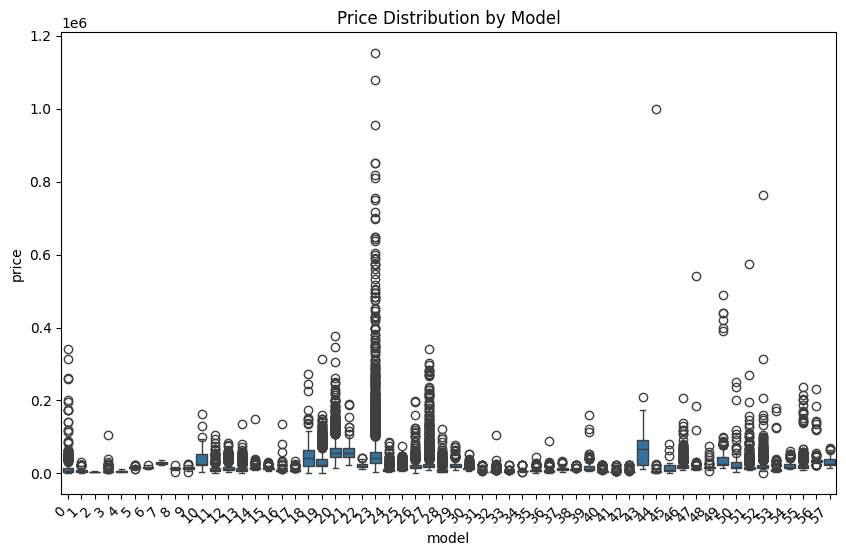

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='price', data=data)
plt.title('Price Distribution by Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

**Price vs Numerical features**

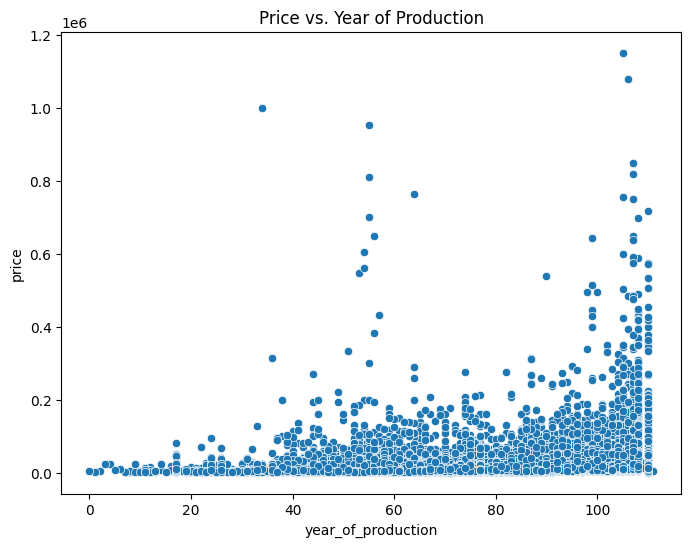

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year_of_production', y='price', data=data)
plt.title('Price vs. Year of Production')
plt.show()

**App Interface,**
**Create input widgets for all features,**
**(Create widgets for all features in X_columns, similar to below)**

In [ ]:
model_widget = widgets.Dropdown(options=data['model'].unique(), description='Model:')
reference_number_widget = widgets.Dropdown(options=data['reference_number'].unique(), description='Reference Number:')
additional_shipping_price_widget = widgets.Dropdown(options=data['aditional_shipping_price'].unique(), description='Additional Shipping Price:')
ad_name_widget = widgets.Dropdown(options=data['ad_name'].unique(), description='Ad Name:')
movement_widget = widgets.Dropdown(options=data['movement'].unique(), description='Movement:')
case_material_widget = widgets.Dropdown(options=data['case_material'].unique(), description='Case Material:')
case_diameter_widget = widgets.Dropdown(options=data['case_diameter'].unique(), description='Case Diameter:')
year_of_production_widget = widgets.Dropdown(options=data['year_of_production'].unique(), description='Year of Production:')
condition_widget = widgets.Dropdown(options=data['condition'].unique(), description='Condition:')
location_widget = widgets.Dropdown(options=data['location'].unique(), description='Location:')
scope_of_delivery_widget = widgets.Dropdown(options=data['scope_of_delivery'].unique(), description='Scope of Delivery:')

# Create a button to trigger prediction
predict_button = widgets.Button(description="Predict Price")

# Output widget to display the prediction
output_widget = widgets.Output()

# Function to make prediction
def predict_price(b):
    with output_widget:
        output_widget.clear_output()  # Clear previous output

        # Get values from all input widgets
        input_data = {
            'model': model_widget.value,
            'reference_number': reference_number_widget.value,
            'aditional_shipping_price': additional_shipping_price_widget.value,
            'ad_name': ad_name_widget.value,
            'movement': movement_widget.value,
            'case_material': case_material_widget.value,
            'case_diameter': case_diameter_widget.value,
            'year_of_production': year_of_production_widget.value,
            'condition': condition_widget.value,
            'location': location_widget.value,
            'scope_of_delivery': scope_of_delivery_widget.value
        }

        # Create a DataFrame from input data
        input_df = pd.DataFrame([input_data])

        # Reorder columns using stored column names
        input_df = input_df[X_columns]

        # Make prediction
        prediction = model.predict(scaler.transform(input_df))[0]

        # Display the prediction
        print(f"Predicted Price: {prediction:.2f}")

# Link button click to prediction function
predict_button.on_click(predict_price)

# Arrange widgets in a layout (adjust as needed)
widgets.VBox([
    model_widget,
    reference_number_widget,
    additional_shipping_price_widget,
    ad_name_widget,
    movement_widget,
    case_material_widget,
    case_diameter_widget,
    year_of_production_widget,
    condition_widget,
    location_widget,
    scope_of_delivery_widget,
    predict_button,
    output_widget
])